# Titanic Survival Prediction

We are using [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic) for our case study.

In this case study, we are predicting whether a person survives or not the titanic disaster. 



### Lets make a quick understanding about the dataset

* 'Survived' : 'whether a person survives or not'   [0 = No, 1 = Yes]
* 'Pclass'   : 'Ticket class'  [1 = 1st(Upper), 2 = 2nd(Middle), 3 = 3rd(Lower)]
* 'Age'      : 'Age in Years'
* 'SibSp'    : 'No. of siblings / spouses aboard the Titanic'
* 'Parch'    : 'No. of parents / children aboard the Titanic'
* 'ticket'   : 'Ticket Number'
* 'fare'     : 'Passenger Fare'
* 'Cabin'    : 'Cabin number'
* 'Embarked' : 'Port of Embarkation'  [C = Cherbourg, Q = Queenstown, S = Southampton]


In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import cufflinks as cf
cf.go_offline()

### Importing titanic dataset

In [4]:
#Importing dataset
titanic=pd.read_csv("survived_data.csv")

### Inspecting dataset

In [5]:
#lets check for duplicates
titanic[titanic.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [6]:
#head of titanic dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#shape of titanic dataset
titanic.shape

(891, 12)

In [8]:
#statitics of titanic dataset
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Exploration

In [9]:
#function to get pecentage on plots
def plotpercent(ax):
    totals = []
    for i in ax.patches:
        totals.append(i.get_height())
    total = sum(totals)
    for i in ax.patches:
        percent = ax.text(i.get_x()+.15, i.get_height()-3.5,str(round((i.get_height()/total)*100, 1))+'%',fontsize = 12,color = 'green',weight = 'bold')
    return percent

### Survived

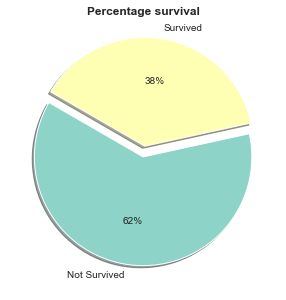

In [80]:
ax=round((titanic['Survived'].value_counts()/len(titanic.index))*100,2)
#define Seaborn color palette to use
colors = sns.color_palette("Set3")

#create pie chart
plt.figure(figsize = (10,5))
plt.title("Percentage survival",weight="bold")
myexplode=(0.0,0.1)
plt.pie(ax, labels = ['Not Survived', 'Survived'], colors = colors, autopct='%.0f%%',startangle=150,shadow=True,explode=myexplode)
plt.show()

### Pclass

Text(1.75, 487.5, '55.1%')

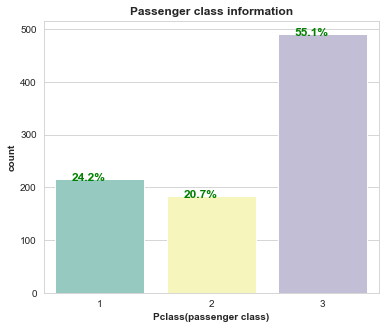

In [11]:
plt.figure(figsize=(6,5))
sns.set_style('whitegrid')
ax=sns.countplot(x = titanic['Pclass'],palette = 'Set3')
ax.set_ylabel('count',weight = 'bold')
ax.set_xlabel('Pclass(passenger class)',weight = 'bold')
ax.set_title('Passenger class information',weight = 'bold')
plotpercent(ax)


**Observations**
From above plot, we can understand that third class passengers are highest with a percentage of 55.1%

### Sex

Text(0.75, 310.5, '35.2%')

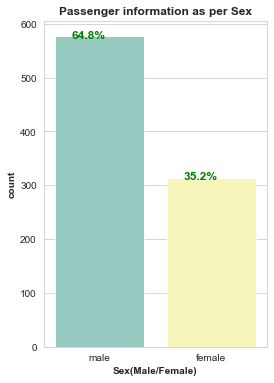

In [12]:
plt.figure(figsize = (4,6))
sns.set_style('whitegrid')
ax=sns.countplot(x = titanic['Sex'],palette = 'Set3')
ax.set_ylabel('count',weight = 'bold')
ax.set_xlabel('Sex(Male/Female)',weight = 'bold')
ax.set_title('Passenger information as per Sex',weight = 'bold')
plotpercent(ax)

**Observations** As per the titanic dataset, the ship had more male passengers with a percentage of 64.8%

### Age

Text(0.5, 1.0, 'Passneger Age Distribution')

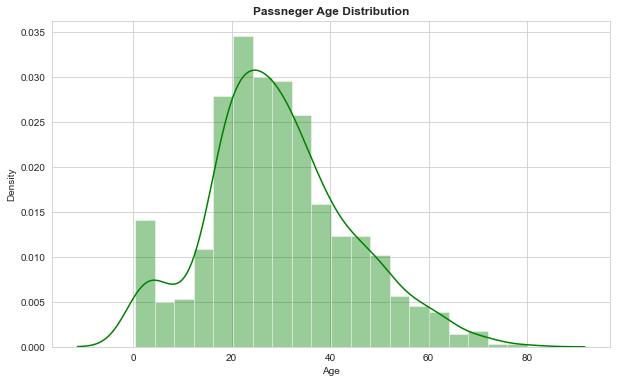

In [13]:
plt.figure(figsize = (10,6))
sns.set_style('whitegrid')
ax=sns.distplot(titanic['Age'],color='green')
ax.set_title('Passneger Age Distribution',weight = "bold")


**Observations** Mostly the passengers belong to 20-45 age group

 ### SibSp - No. of siblings / spouses aboard the Titanic

Text(5.75, 3.5, '0.8%')

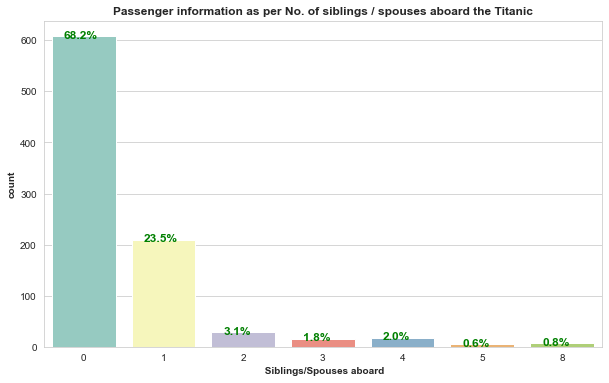

In [14]:
titanic['SibSp'].value_counts()
plt.figure(figsize = (10,6))
sns.set_style('whitegrid')
ax=sns.countplot(x = titanic['SibSp'],palette = 'Set3')
ax.set_ylabel('count',weight = 'bold')
ax.set_xlabel(' Siblings/Spouses aboard',weight = 'bold')
ax.set_title('Passenger information as per No. of siblings / spouses aboard the Titanic',weight = 'bold')
plotpercent(ax)

**Observations** As per the dataset, passengers having no Siblings/Spouses are higher and have a percentage of 68.2%

### Parch - No. of parents / children aboard the Titanic

Text(5.75, -2.5, '0.1%')

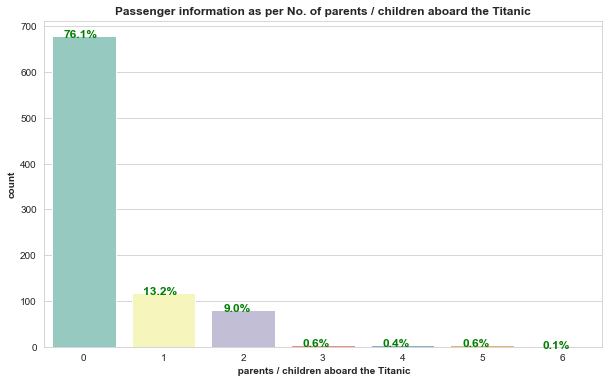

In [15]:
titanic['SibSp'].value_counts()
plt.figure(figsize = (10,6))
sns.set_style('whitegrid')
ax=sns.countplot(x = titanic['Parch'],palette = 'Set3')
ax.set_ylabel('count',weight = 'bold')
ax.set_xlabel(' parents / children aboard the Titanic',weight = 'bold')
ax.set_title('Passenger information as per No. of parents / children aboard the Titanic',weight = 'bold')
plotpercent(ax)

**Observations** Passengers having no parents/children aboard is higher and have a percentage of 76.1%

### Fare

Text(0.5, 1.0, 'Fare Distribution Plot')

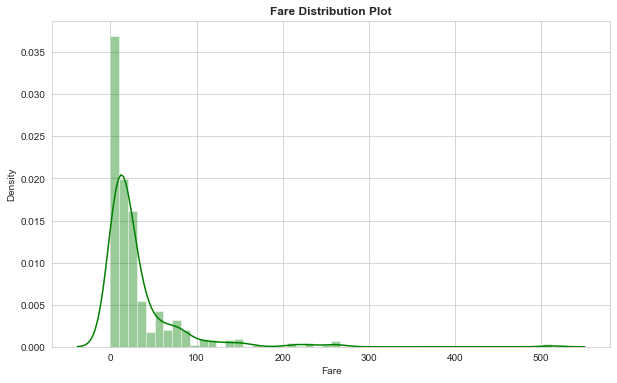

In [16]:
plt.figure(figsize = (10,6))
sns.set_style('whitegrid')
ax=sns.distplot(titanic['Fare'],color='green')
plt.title('Fare Distribution Plot',weight='bold')

### Embarked

Text(1.75, 73.5, '8.7%')

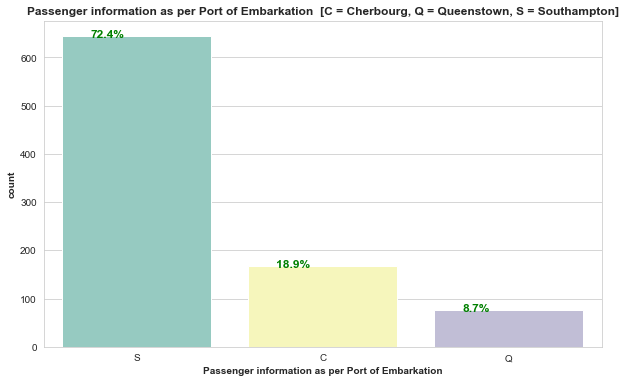

In [17]:

plt.figure(figsize = (10,6))
sns.set_style('whitegrid')
ax=sns.countplot(x = titanic['Embarked'],palette = 'Set3')
ax.set_ylabel('count',weight = 'bold')
ax.set_xlabel('Passenger information as per Port of Embarkation',weight = 'bold')
ax.set_title('Passenger information as per Port of Embarkation  [C = Cherbourg, Q = Queenstown, S = Southampton]',weight = 'bold')
plotpercent(ax)

**Observations** 72.4 percent passengers where embarked from South Hampton

### Comparing the predictor variable and other variabes

**Survived v/s Pclass**

In [18]:
#grouping pclass according to passeneger class 
pclass1=titanic.groupby(titanic["Pclass"]).get_group(1)
pclass2=titanic.groupby(titanic["Pclass"]).get_group(2)
pclass3=titanic.groupby(titanic["Pclass"]).get_group(3)

Text(0.14999999999999997, 115.5, '24.2%')

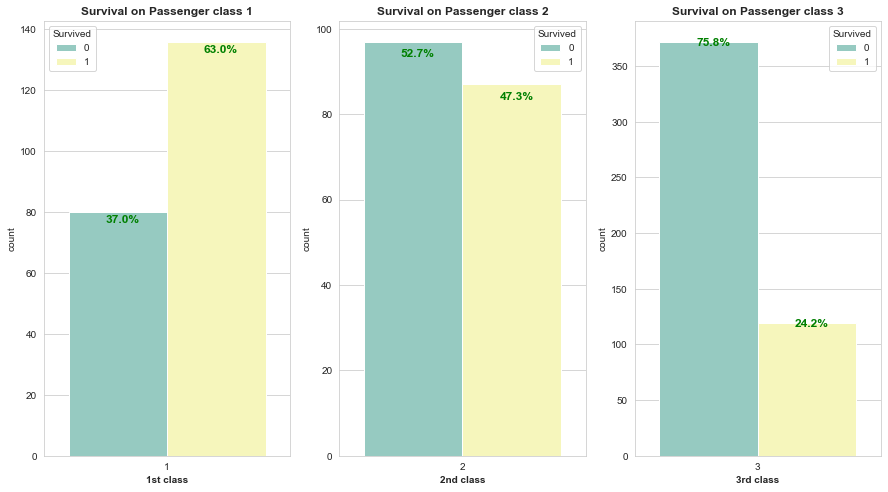

In [19]:
plt.figure(figsize = (15,8))
plt.subplot(1,3,1)
plt.title('Survival on Passenger class 1',weight = 'bold')
ax=sns.countplot(x ='Pclass',hue = 'Survived',data = pclass1,palette = 'Set3')
ax.set_xlabel('1st class',weight = 'bold')
plotpercent(ax)

plt.subplot(1,3,2)
plt.title('Survival on Passenger class 2',weight = 'bold')
ax=sns.countplot(x ='Pclass',hue = 'Survived',data = pclass2,palette = 'Set3')
ax.set_xlabel('2nd class',weight = 'bold')
plotpercent(ax)

plt.subplot(1,3,3)
plt.title('Survival on Passenger class 3',weight = 'bold')
ax=sns.countplot(x ='Pclass',hue = 'Survived',data = pclass3,palette = 'Set3')
ax.set_xlabel('3rd class',weight = 'bold')
plotpercent(ax)

**Observations** 

In **First Class**, 63.0% passengers survived.

In **Second Class**, 47.3% passengers survived.

In **Third Class**, 24.2% passnegers survived.

*Passengers having Third class ticket had lesser chances of survival while passengers of First class Ticket had higher survival*


**Survived v/s Sex**

In [20]:
#grouping sex as per male/female
sex_male=titanic.groupby(titanic['Sex']).get_group('male')
sex_female=titanic.groupby(titanic['Sex']).get_group('female')

Text(0.14999999999999997, 229.5, '74.2%')

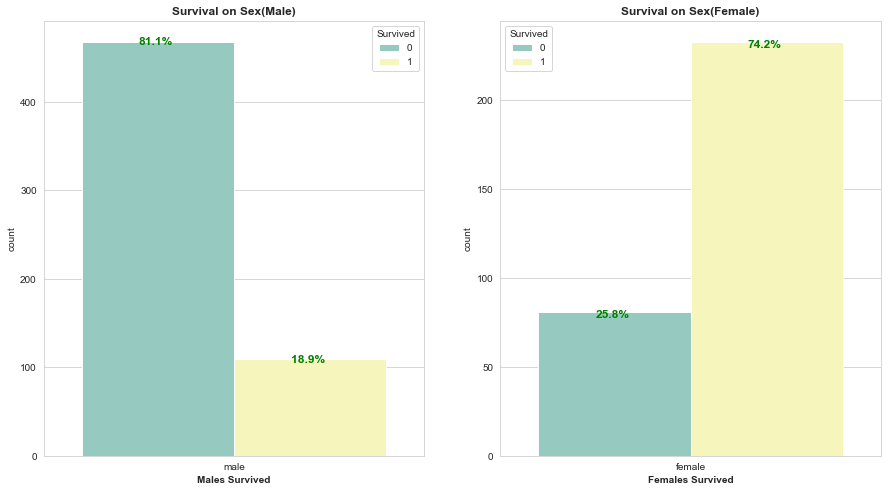

In [21]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
plt.title('Survival on Sex(Male)',weight = 'bold')
ax=sns.countplot(x ='Sex',hue = 'Survived',data = sex_male,palette = 'Set3')
ax.set_xlabel('Males Survived',weight = 'bold')
plotpercent(ax)

plt.subplot(1,2,2)
plt.title('Survival on Sex(Female)',weight = 'bold')
ax=sns.countplot(x ='Sex',hue = 'Survived',data = sex_female,palette = 'Set3')
ax.set_xlabel('Females Survived',weight = 'bold')
plotpercent(ax)

**Observations**

Only 18.9% of males and 74.2% of females survived the disaster.

As we know that, ship had 64.8% of total passengers is males and only 18.9% of total males survived.

Females had higher chances of survival as per dataset.

**Survived v/s Age**

In [22]:
#creating a dataframe containing Age and Survived columns of titanic
survive_age=titanic[['Age','Survived',]].dropna()

Text(0.5, 0, 'Age')

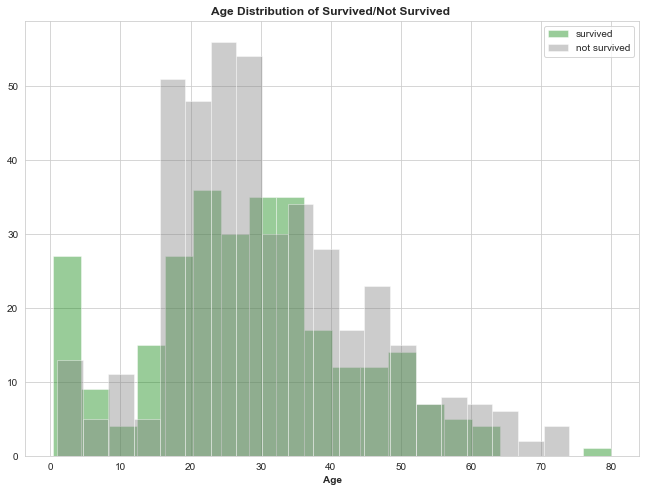

In [23]:
plt.figure(figsize=(11,8))
ax=sns.distplot(survive_age[survive_age['Survived']==1].Age,bins = 20,label = "survived",kde = False,color = 'green')
ax=sns.distplot(survive_age[survive_age['Survived']==0].Age,bins = 20,label = "not survived",kde = False,color = 'grey')
ax.legend()
ax.set_title('Age Distribution of Survived/Not Survived ',weight = 'bold')
ax.set_xlabel('Age',weight = 'bold')


Now we can understand that, higher chances not surviving the disaster lies between age group 15-30

### Survived v/s SibSp , Parch

In [24]:
survive_sibsp=titanic[['SibSp','Survived']]

In [25]:
survive_parch=titanic[['Parch','Survived']]

Text(0.5, 0, 'Parents/Children aboard')

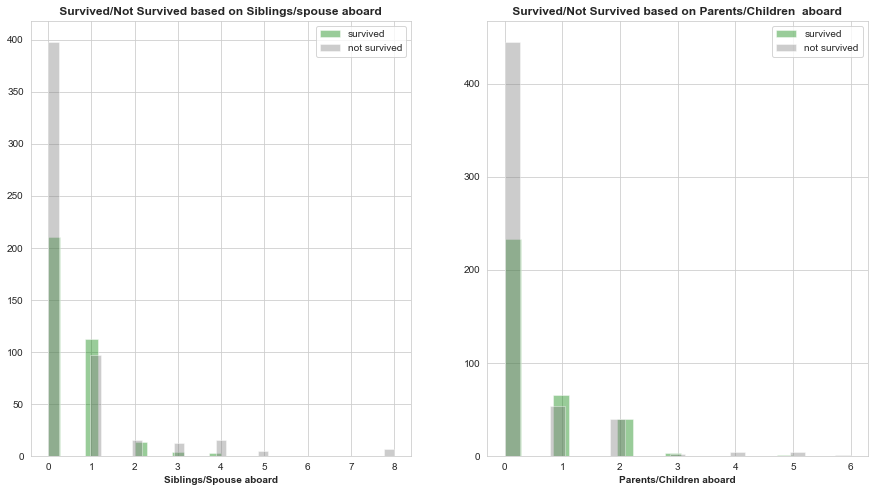

In [26]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)

ax=sns.distplot(survive_sibsp[survive_sibsp['Survived']==1].SibSp,label = "survived",kde=False,color='green')
ax=sns.distplot(survive_sibsp[survive_sibsp['Survived']==0].SibSp,label = "not survived",kde=False,color='grey')
ax.legend()
ax.set_title(' Survived/Not Survived based on Siblings/spouse aboard ',weight = 'bold')
ax.set_xlabel('Siblings/Spouse aboard',weight = 'bold')

plt.subplot(1,2,2)
ax=sns.distplot(survive_parch[survive_parch['Survived']==1].Parch,label = "survived",kde=False,color='green')
ax=sns.distplot(survive_parch[survive_parch['Survived']==0].Parch,label = "not survived",kde=False,color='grey')
ax.legend()
ax.set_title(' Survived/Not Survived based on Parents/Children  aboard ',weight = 'bold')
ax.set_xlabel('Parents/Children aboard',weight = 'bold')

passengers having no Siblings/Spouse and Parents/Children aboard had lesser chances of survival 


### Survived v/s Embarked

In [27]:
survive_embarked=titanic[['Embarked','Survived']]

In [28]:
survive_embarked['Embarked']=survive_embarked['Embarked'].map({'S':'Southampton','C':'Cherbourg','Q':'Queenstown'})

In [29]:
survive_embarked.dropna(inplace=True)

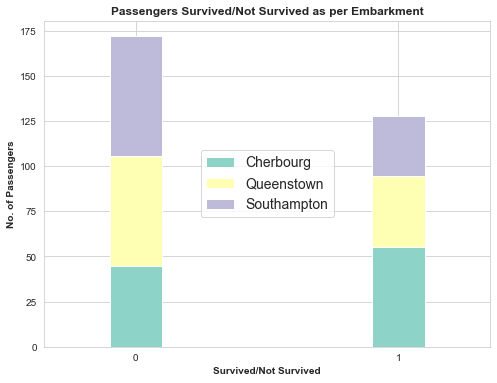

In [30]:
se=survive_embarked.groupby(['Embarked','Survived']).size().unstack()
se
ax=(se.T*100.0/se.T.sum()).plot(kind='bar',stacked=True,color=colors,rot=0,width=0.2,figsize=(8,6))
ax.set_title('Passengers Survived/Not Survived as per Embarkment',weight='bold')
ax.set_ylabel('No. of Passengers',weight='bold')
ax.set_xlabel('Survived/Not Survived',weight='bold')

ax.legend(loc='center',prop={'size':14},fontsize =6)



### Data Cleaning

<AxesSubplot:>

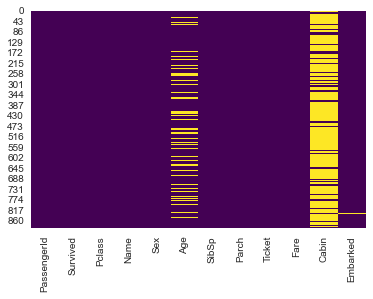

In [31]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

There are null values in  Age and Cabin


**Age**

we can impute Age by understanding Pclass.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

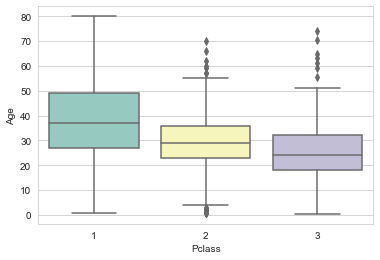

In [32]:
sns.boxplot(x="Pclass",y="Age",data=titanic,palette="Set3")

In [33]:
def imputeage(cols):    #imputing with medain values
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return age
     

In [34]:
titanic["Age"]=titanic[["Age","Pclass"]].apply(imputeage,axis=1)

**Cabin**

In [35]:
titanic.drop("Cabin",axis=1,inplace=True)

In [36]:
titanic.dropna(inplace=True)

<AxesSubplot:>

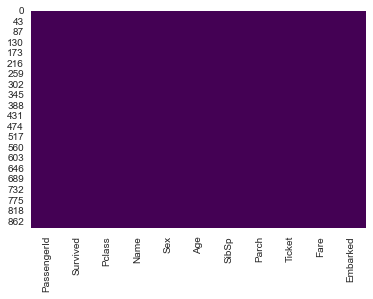

In [37]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

### Data Preparation

In [38]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [39]:
#we are replacing S ,C and Q as 1,2 and 3
titanic['Embarked'].replace({'S':1,'C':2,'Q':3},inplace=True)

In [40]:
# Change the values of sex column to categorical values
titanic['Sex'].replace({'male':0,'female':1},inplace=True)

In [41]:
 titanic.drop(['Ticket','Name','Fare'],axis=1,inplace=True)

### Model Creation and Prediction

In [43]:
X=titanic.drop(['Survived'],axis=1)
y=titanic['Survived']

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
passengerid=X_test['PassengerId'] 

In [49]:
X_train.drop(['PassengerId'],axis=1,inplace=True)
X_test.drop(['PassengerId'],axis=1,inplace=True)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [51]:
#Logistic Regression
model1=LogisticRegression()
model1.fit(X_train,y_train)
pred=model1.predict(X_test)
log_acc=accuracy_score(pred,y_test);
print(log_acc)

0.8033707865168539


In [62]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators = 50)
model2.fit(X_train,y_train)
pred_2=model2.predict(X_test)
rcf=accuracy_score(pred_2,y_test);
print(rcf)

0.8033707865168539


In [63]:
#DecisionTreeClassifier
from sklearn import tree
model3=tree.DecisionTreeClassifier()
model3.fit(X_train,y_train)
pred_3=model3.predict(X_test)
dtc=accuracy_score(pred_3,y_test);
print(dtc)

0.797752808988764


Accuracy of Logistic Regression      :  0.8033707865168539
Accuracy of Decision Tree Classifier :  0.797752808988764
Accuracy of Random Forest Classifier :  0.8033707865168539


(0.6, 1.0)

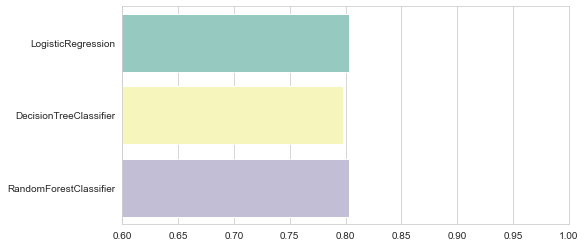

In [82]:
print("Accuracy of Logistic Regression      : ",log_acc)
print("Accuracy of Decision Tree Classifier : ",dtc)

print("Accuracy of Random Forest Classifier : ",rcf)
models_acc=[log_acc,dtc,rcf]
names_of_models=['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier']
sns.barplot(y=names_of_models,x=models_acc,palette = 'Set3')
plt.gcf().set_size_inches(8,4)
plt.xlim([0.6,1.0])

we are choosing Logistic Regression

In [65]:
pred=model1.predict(X_test)

In [68]:
 submission=pd.DataFrame({"PassengerId": passengerid,"Survived":pred})

In [75]:
submission=submission.reset_index(drop=True)

In [81]:
submission.head()


,PassengerId,Survived
0,282,0
1,436,1
2,40,1
3,419,0
4,586,1
